

<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">Open for (Neuro)Science</h3>
<h3 align="center">March 9, 2021</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.stats as st

### Brain Observatory Setup

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
drive_path = '/data/allen-brain-observatory/visual-coding-2p'
manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location. The drive_path and manifest_file here are set up for the AWS environment.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Getting oriented to the dataset</h1>

</div>

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset - the conditions under which each experiment was acquired. It also allows us to access those data, once we select what we want to use.

Let's take a look at the available **imaging depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory 2P dataset.

Start by getting all the areas, which we call "targeted structures"

Use similar functions to get all imaging depths, all cre lines, all reporter lines, all stimuli, and all session types

### Other boc functions
These "get all X" functions return the unique values for key experiment parameters. We can use these parameters to find experiments of interest and use other boc functions to get those data.

### 1.1 Experiment containers & sessions

The <b>experiment container</b> describes a set of 3 imaging sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Choose a visual area and Cre line from the lists above
</div>

In [3]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

<b>get_experiment_containers</b> returns a list of experiment containers that meets the conditions we have specified. If we don't pass any parameters, it returns all experiment containers. 

How many experiment containers are there for the area and Cre line you chose?

What information do we get from this list? Make a dataframe of this list, to compare the information for each container.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.
</div>

In [13]:
experiment_container_id = 511510736

<b>get_ophys_experiments</b> returns a list of <b>imaging sessions</b> for the conditions that we specified (in this case we passed a single experiment container id). If we don't pass any parameters, it returns all imaging sessions. What other keywords can we use to select imaging sessions?

!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's get the id for the imaging session for this container that container natural scenes
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Getting data for an experiment</h1>


</div>

<b>get_ophys_experiment_data</b> returns the data object giving us access to everything in the NWB file for a single imaging session

### 2.1 Maximum projection
This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

### 2.2 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

What is the shape of this array? How many neurons are in this experiment?

In [19]:
print(rois.shape[0])

174


Plot the masks for all the ROIs.

### 2.3 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

Let's look at the first neuron

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(dff[0,:])

plt.ylabel("DFF (%)", fontsize=16)

Let's look at the first 50 cells. 

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

It looks like different cells are active at different times. What could that be about?

### 2.4 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs


Get the stimulus epoch table from data_set and print the table

Overlay stimulus epochs on the DFF traces.  

In [ ]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.5 Running speed

The running speed of the animal on the rotating disk during the entire session.

Plot the running speed. Label the units (they are cm/s)

Add the running speed to the neural activity and stimulus epoch figure

In [ ]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### Interesting things

There are some interesting neurons here.  Plot the dff trace for neuron 49 with the stimulus epochs, and running trace. Repeat for neuron 4. And for neuron 35.  What is intereating about these neurons

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[49,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[4,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[35,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.5b Extracted events
As of the October 2018 data release, we are providing access to events extracted from the DFF traces using the L0 method developed by Sean Jewell and Daniella Witten. These are not stored in the NWB file, thus aren't a function of the data_set object, but are available through the boc

Plot the events and the dff trace for one neurons (say neuron 1). Zoom in to a relevant portion.

In [ ]:
plt.plot(2*events[1,:])
plt.plot(dff[1,:]-5)
plt.xlim(20000,21000)

Remake our plot of neural activty, stimulus, and running using events

In [ ]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(5*(events[i,:]+(i*2)), color='gray')
    
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.6 Stimulus Table
For each stimulus there is a stimulus table with information about the condition and timing of each trial. 

In [52]:
natural_scene_table = 

Get the stimulus table for static gratings. Print the top of this dataframe. What are the parameters for this stimulus?

### 2.7 Stimulus Template

The images and movies presented during the session area also included in the NWB file as the <b>stimulus template</b>. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

Look at the scene presented for the first trial

Plot the time when this image is presented overlayed on the activity the 50 neurons

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

### 2.8 Metadata
This includes metadata about the experiment, some of which we used to select this experiment, some of which is only included here.

Metadata includes: age, sex, device & device_name, genotype, start_time.  Note: start_time is not the time the experiment was collected, but rather the time the NWB file was created.  We are hoping to fix this soon.  :(

# 2.9 Cell ids and indices

Each cell in the dataset has a unique id, called the cell specimen id. To find the cells in this session, get the cell specimen ids. This id can be used to find experiments/session - as we'll do later today.

Within each individual session, a cell id is associated with an index. This index maps into the dff of event traces.  Pick one cell id from the list above and find the index for that cell. Look for the cell specimen indices.

# 2.10 Cell Specimen Table

For every cell in the entire observatory dataset, there are precomputed metrics for the different stimuli. These metrics can be useful for identifying neurons you want to use for further analysis. 

Find the mean g_osi_dg for the neurons in the experiment container you've chosen

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 3. (BONUS!) Accessing calcium movies.</h2>

If you accessing the data on AWS, you can find the files for the calcium data (more precisely, the motion corrected calcium movies).  Here is an example piece of code that shows the beginning of the experiment we've been looking at.

</div>

In [70]:
import h5py
from matplotlib import animation, rc
from IPython.display import HTML

In [71]:
raw_data_dir = '/data/allen-brain-observatory/visual-coding-2p/ophys_movies/'

In [72]:
def get_raw_data_path(session_id):
    return os.path.join(raw_data_dir, 'ophys_experiment_'+str(session_id)+'.h5')

exp_path = get_raw_data_path(session_id)

In [73]:
raw_data = h5py.File(exp_path, 'r')
raw_data['data']

<HDF5 dataset "data": shape (113888, 512, 512), type "<u2">

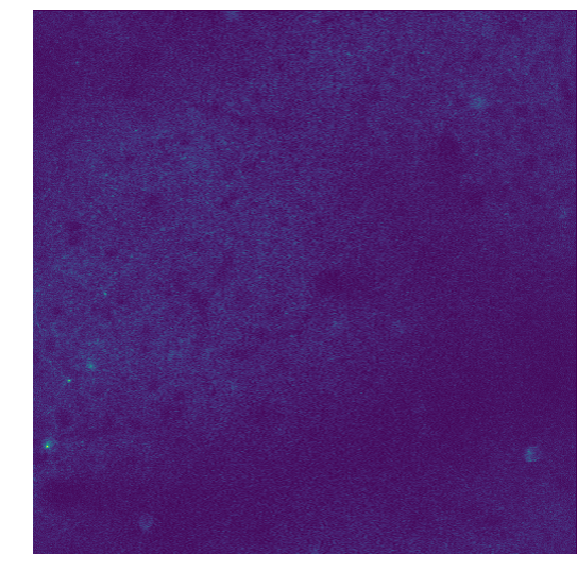

In [74]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(raw_data['data'][0])
ax.axis('off')

def init():
    im.set_data(raw_data['data'][0])
    return (im,)

def animate(i):
    im.set_data(raw_data['data'][i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1000./30, blit=True)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1>Part 4: Compute the tuning curve for the drifting grating stimulus</h1>

We are going to look at the response of a single neuron, identified by its cell specimen id.

</div>

In [25]:
cell_id = 541513979

First get the dataset for the **experiment session** that this cell is in that has the drifting grating stimulus

Get the DF/F trace for your cell. For now we just want to think about one cell, so just get the trace for that cell.

Let's plot the DF/F trace of our cell to see what it looks like

Get the stimulus table for the drifting grating stimulus

Let's look at the stimulus table to see what information there is. You just want to see the first few lines, so use the function <b>head</b> to see the top of this DataFrame.

To look at the cell's response to a given grating presentation, let's plot the DF/F of the cell during the presentation of that grating.  We want to pad the plot with ~ 1 second of the DF/F trace preceding the grating presentation.  1 second = 30 frames.  We'll plot the response to the first grating presentation. Print the grating direction and temporal frequency as well.

Quantify this response by calculating the mean DF/F during the grating presentation


Repeat this (the plot and the quantification) for the next grating stimulus

<div style="background: ##DFF0D8; border-radius: 3px; padding: 10px;">

<p>Calculate the mean DF/F for each grating presentation in this stimulus. 
Create a numpy array to hold our calculated responses with three columns, one for the stimulus orientation, one for temporal frequency, and the last for the response. Then we need to iterate over all stimulus trials, populate the orientation and TF and then calculate the mean response.
</div>

You need to know what all the possible orientation values are. You can either find this from the website, white paper documentation, platform paper preprint ... or you can find the <b>unique</b> values that are not NaNs (eg. values that are <b>finite</b>) from either the stimulus table or the columns you just set up in the array.


(Side note: what are the trials when the orientation and temporal frequency is NaN? These are the blank sweeps)

Create an array of the mean response of your neuron to each grating condition, size (8,5) for orientation X temporal frequency

Plot a heatmap of the responses to all conditions

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 5: Compute and compare the tuning for all cells in this experiment</h1>

Now we are going to compute the same tuning curve for all of the cells in your experiment, and compare how similar they are with each other by computing the signal correlation.
</div>

Get the DF/F traces for all of neurons in the dataset. Previously we only got one trace, now we want them all.

How many neurons are in the dataset? This will be a useful variable later. Call it **numbercells**

<div style="background: ##DFF0D8; border-radius: 3px; padding: 10px;">

<p>There are some data objects available through the SDK that do some of the analysis for us. For instance, there is a dataframe called <b>mean_sweep_response</b> that has the mean DF/F for each stimulus trial for all cells. This is essentially what we calculated above for just one cell, extrapolated to all the cells. There are some differences in how it's done - ask me if you are super interested in them.
</div>

To access the analysis objects we need to import the analysis for this stimulus and implement that for this data set.

In [48]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

Get the mean sweep response from the analysis object. What is its shape?

What are the columns of this dataframe?

The keys for the dataframe and the <i>cell index</i> for each cell. And the last column of this dataframe is not a cell, but the <i>mean running speed</i> for each trial, 'dx'. This might be useful for some analyses comparing running to stationary, or it might not be relevant to a particular question. Let's look at it briefly. Plot the running speed column of the dataframe.

For our analysis today we want to ignore the running speed, so drop the column from the dataframe.

Write a function to create an array with dimensions (8,5,numbercells) with the mean response to each condition for each cell in your experiment.

Confirm your function by plotting the mean response for the cell that you used above. You need to find the cell index for your cell. Use data_set.get_cell_specimen_indices to find the index for that cell.

Now we can compute the signal correlations, comparing the tuning curves of all the neurons.

What is the mean signal correlations across all the cells in your experiment?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 6: Correlations of movie responses </h1>

Drifting gratings isn't the only stimulsu presented during this session. We will compute the correlation of the responses to natural movie three across neurons to compare with the drifting gratings.
</div>

Find what other stimuli were presented during this session.

The DF/F traces we have are for the entire session, so we already have that. But we need the stimulus table for the natural movie.

How many frames are in the natural movie? How many repeats? How long does each frame (typically) last? (why might it vary from this?) 

Out of curiosity, let's look at the first and the last frame of the movie. Get the stimulus template for this movie and plot the first and the last frame of the movie.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Compute the mean response for each neuron to the movie.  

</div>

Plot the mean movie response for the cell you analyzed above

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Compute the correlation of mean movie response for all neurons

</div>


What is the mean correlations across all the cells in your experiment?

Which neuron has the highest correlation with your neuron for the natural movie? Is it the same neuron as for the drifting gratings? Plot both of their movie responses.

Do these cells have similar responses to the drifting grating stimulus too?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Are the signal correlations of the movie and drifting grating responses correlated?
</div>

<div style="background: #fad7e4; border-radius: 3px; padding: 10px;">
Challenge: Does this relationship depend on cell type or area?
</div>